# RQ: How do gRPC interceptors affect throughput and latency in microservice architectures?

In [7]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load & Clean Data

In [13]:
# 0 = no interceptor
# 1 = interceptor
# postion in name: 
# 001 = Open Telemetry
# 010 = Prometheus
# 100 = Logging

# -------------- loading data -------------- #

result_000 = '../results/results_000.csv'   # no interceptor
result_001 = '../results/results_001.csv'   # Open Telemetry
#result_010 = '../results/results_010.csv'   # Prometheus
#result_011 = '../results/results_011.csv'   # Open Telemetry + Prometheus
#result_100 = '../results/results_100.csv'   # Logging
#result_101 = '../results/results_101.csv'   # Open Telemetry + Logging
#result_110 = '../results/results_110.csv'   # Prometheus + Logging
result_111 = '../results/results_111.csv'   # Open Telemetry + Prometheus + Logging

results = [result_000, result_001, result_111]

data_000 = pd.read_csv(result_000)
data_001 = pd.read_csv(result_001)
#data_010 = pd.read_csv(result_010)
#data_011 = pd.read_csv(result_011)
#data_100 = pd.read_csv(result_100)
#data_101 = pd.read_csv(result_101)
#data_110 = pd.read_csv(result_110)
data_111 = pd.read_csv(result_111)

datasets = [data_000, data_001, data_111]

# -------------- cleaning data -------------- #

# Helper function to convert latency string to float
def convert_latency_to_ms(latency_str):
    if 'ms' in latency_str:
        return float(latency_str.replace('ms', '').strip())
    elif 'µs' in latency_str:
        return float(latency_str.replace('µs', '').strip()) / 1000
    else:
        return 0

# Apply the function to Min and Max Latency columns
for dataset in datasets:
    data = dataset
    # remove the second row of each dataset
    data = data.drop([1])

    data['Average Latency'] = data['Average Latency'].apply(convert_latency_to_ms)
    data['Max Latency'] = data['Max Latency'].apply(convert_latency_to_ms)
    data['Min Latency'] = data['Min Latency'].apply(convert_latency_to_ms)


## Plotting

### Q: How deas each a **single** interceptor affect throughput?

### Q: How does each a **single** interceptor affect latency?

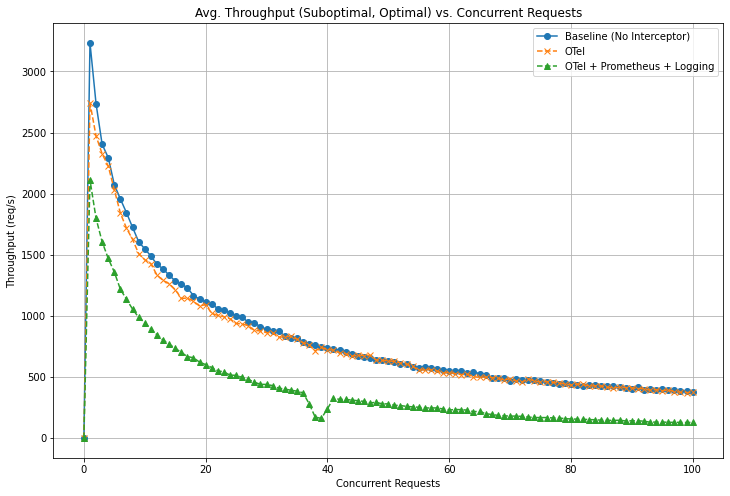

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(data_000['Concurrent Requests'], data_000['Avg. Throughput req/s'], marker='o', label='Baseline (No Interceptor)')
plt.plot(data_001['Concurrent Requests'], data_001['Avg. Throughput req/s'], marker='x', linestyle='--', label='OTel')
plt.plot(data_111['Concurrent Requests'], data_111['Avg. Throughput req/s'], marker='^', linestyle='--', label='OTel + Prometheus + Logging')

plt.title('Avg. Throughput (Suboptimal, Optimal) vs. Concurrent Requests')
plt.xlabel('Concurrent Requests')
plt.ylabel('Throughput (req/s)')
# plt.yticks(np.arange(0, 1, 0.1))
plt.legend()
plt.grid(True)
plt.show()